<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1_optimization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

customerID : 소비자의 식별자\
gender : 성별\
SeniorCitizen : 노인인지의 여부\
Partner : 배우자의 유무\
Dependents : 자녀의 유무\
tenure : 고객의 가입 기간 (개월 수)\
PhoneService : 휴대폰 서비스를 가입 했는지의 여부\
MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.\
InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)\
OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.\
Contract : 계약 유형 (Month-to-month, One year, Two year)\
PaperlessBilling : 전자 고지서 여부\
PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))\
MonthlyCharges : 매달 고객에게 청구되는 금액\
TotalCharges : 고객에게 청구된 총 금액\
Churn : 지난 한 달 내에 떠난 고객인지의 여부\

In [1]:
#https://suy379.tistory.com/54


In [19]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

In [3]:
data=pd.read_csv('/content/drive/MyDrive/02.coding/10.Team_Project/08.고객이탈예측/churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.drop('customerID',axis='columns',inplace=True)
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6747,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No
5259,Male,1,Yes,No,30,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,77.90,2351.45,No
1222,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,69.25,4447.75,No
6504,Male,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,79.25,267.6,Yes
2130,Male,0,No,No,51,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,Yes,Electronic check,94.80,4837.6,Yes


In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
set(''.join(data['TotalCharges'].tolist()))

{' ', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [8]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [9]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##Exploratory Data Analysis

In [12]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [13]:
num_cols = ['tenure','monthlycharges', 'totalcharges']

In [14]:
data[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [15]:
data[[col for col in data.columns.difference(num_cols) if col != 'seniorcitizen']].describe().T

,count,unique,top,freq
churn,7043,2,No,5174
contract,7043,3,Month-to-month,3875
dependents,7043,2,No,4933
deviceprotection,7043,3,No,3095
gender,7043,2,Male,3555
internetservice,7043,3,Fiber optic,3096
multiplelines,7043,3,No,3390
onlinebackup,7043,3,No,3088
onlinesecurity,7043,3,No,3498
paperlessbilling,7043,2,Yes,4171


In [16]:
data['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [17]:
ord_cols = ['dependents', 'gender', 'paperlessbilling', 'partner', 'phoneservice']
label = 'churn'
cat_cols = ['seniorcitizen', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract','paymentmethod']


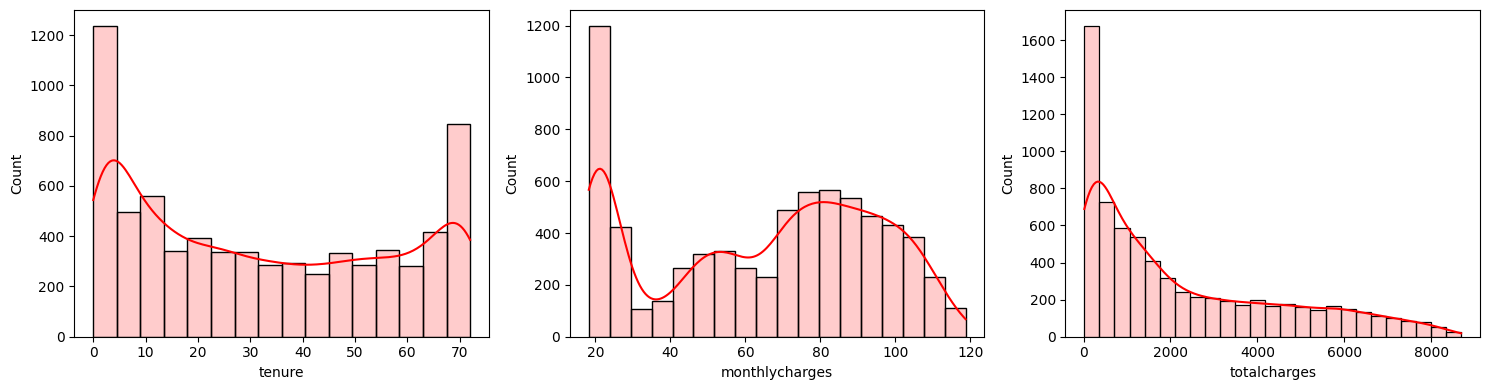

In [20]:
plt.figure(figsize = (15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data, x= col, color = 'red', alpha = 0.2, kde = True)
plt.tight_layout()
plt.show()

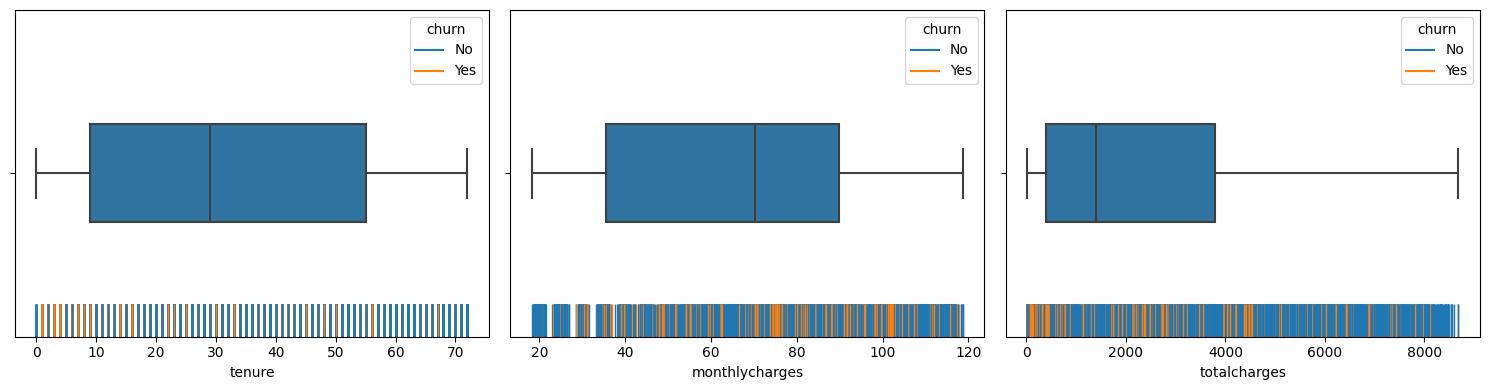

In [23]:
plt.figure(figsize = (15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.rugplot(data, x = col, hue= label, height = 0.1)
    sns.boxplot(data, x = col, width = 0.3)
plt.tight_layout()
plt.show()

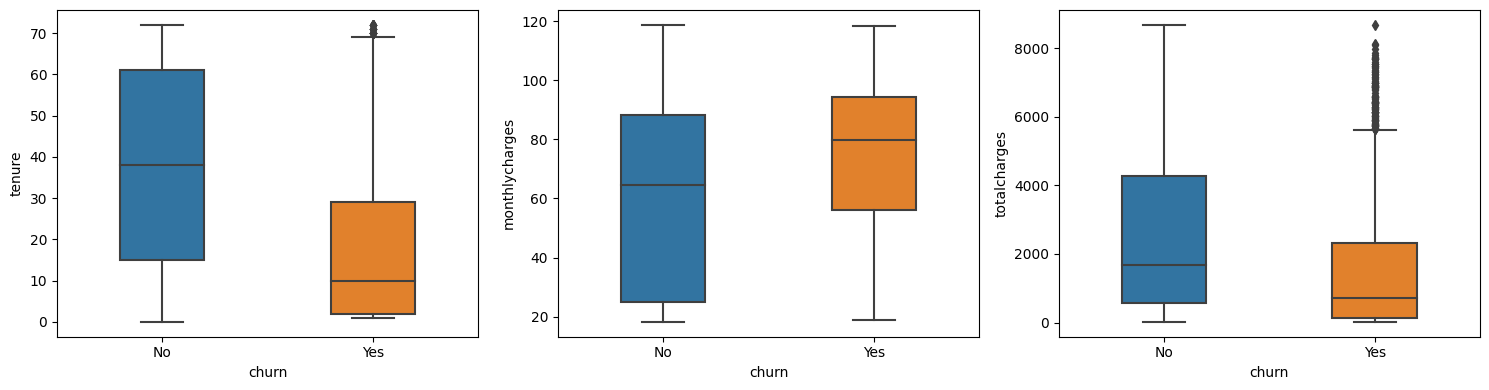

In [24]:
plt.figure(figsize = (15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data, x = label, y = col, width = 0.4)
plt.tight_layout()
plt.show()

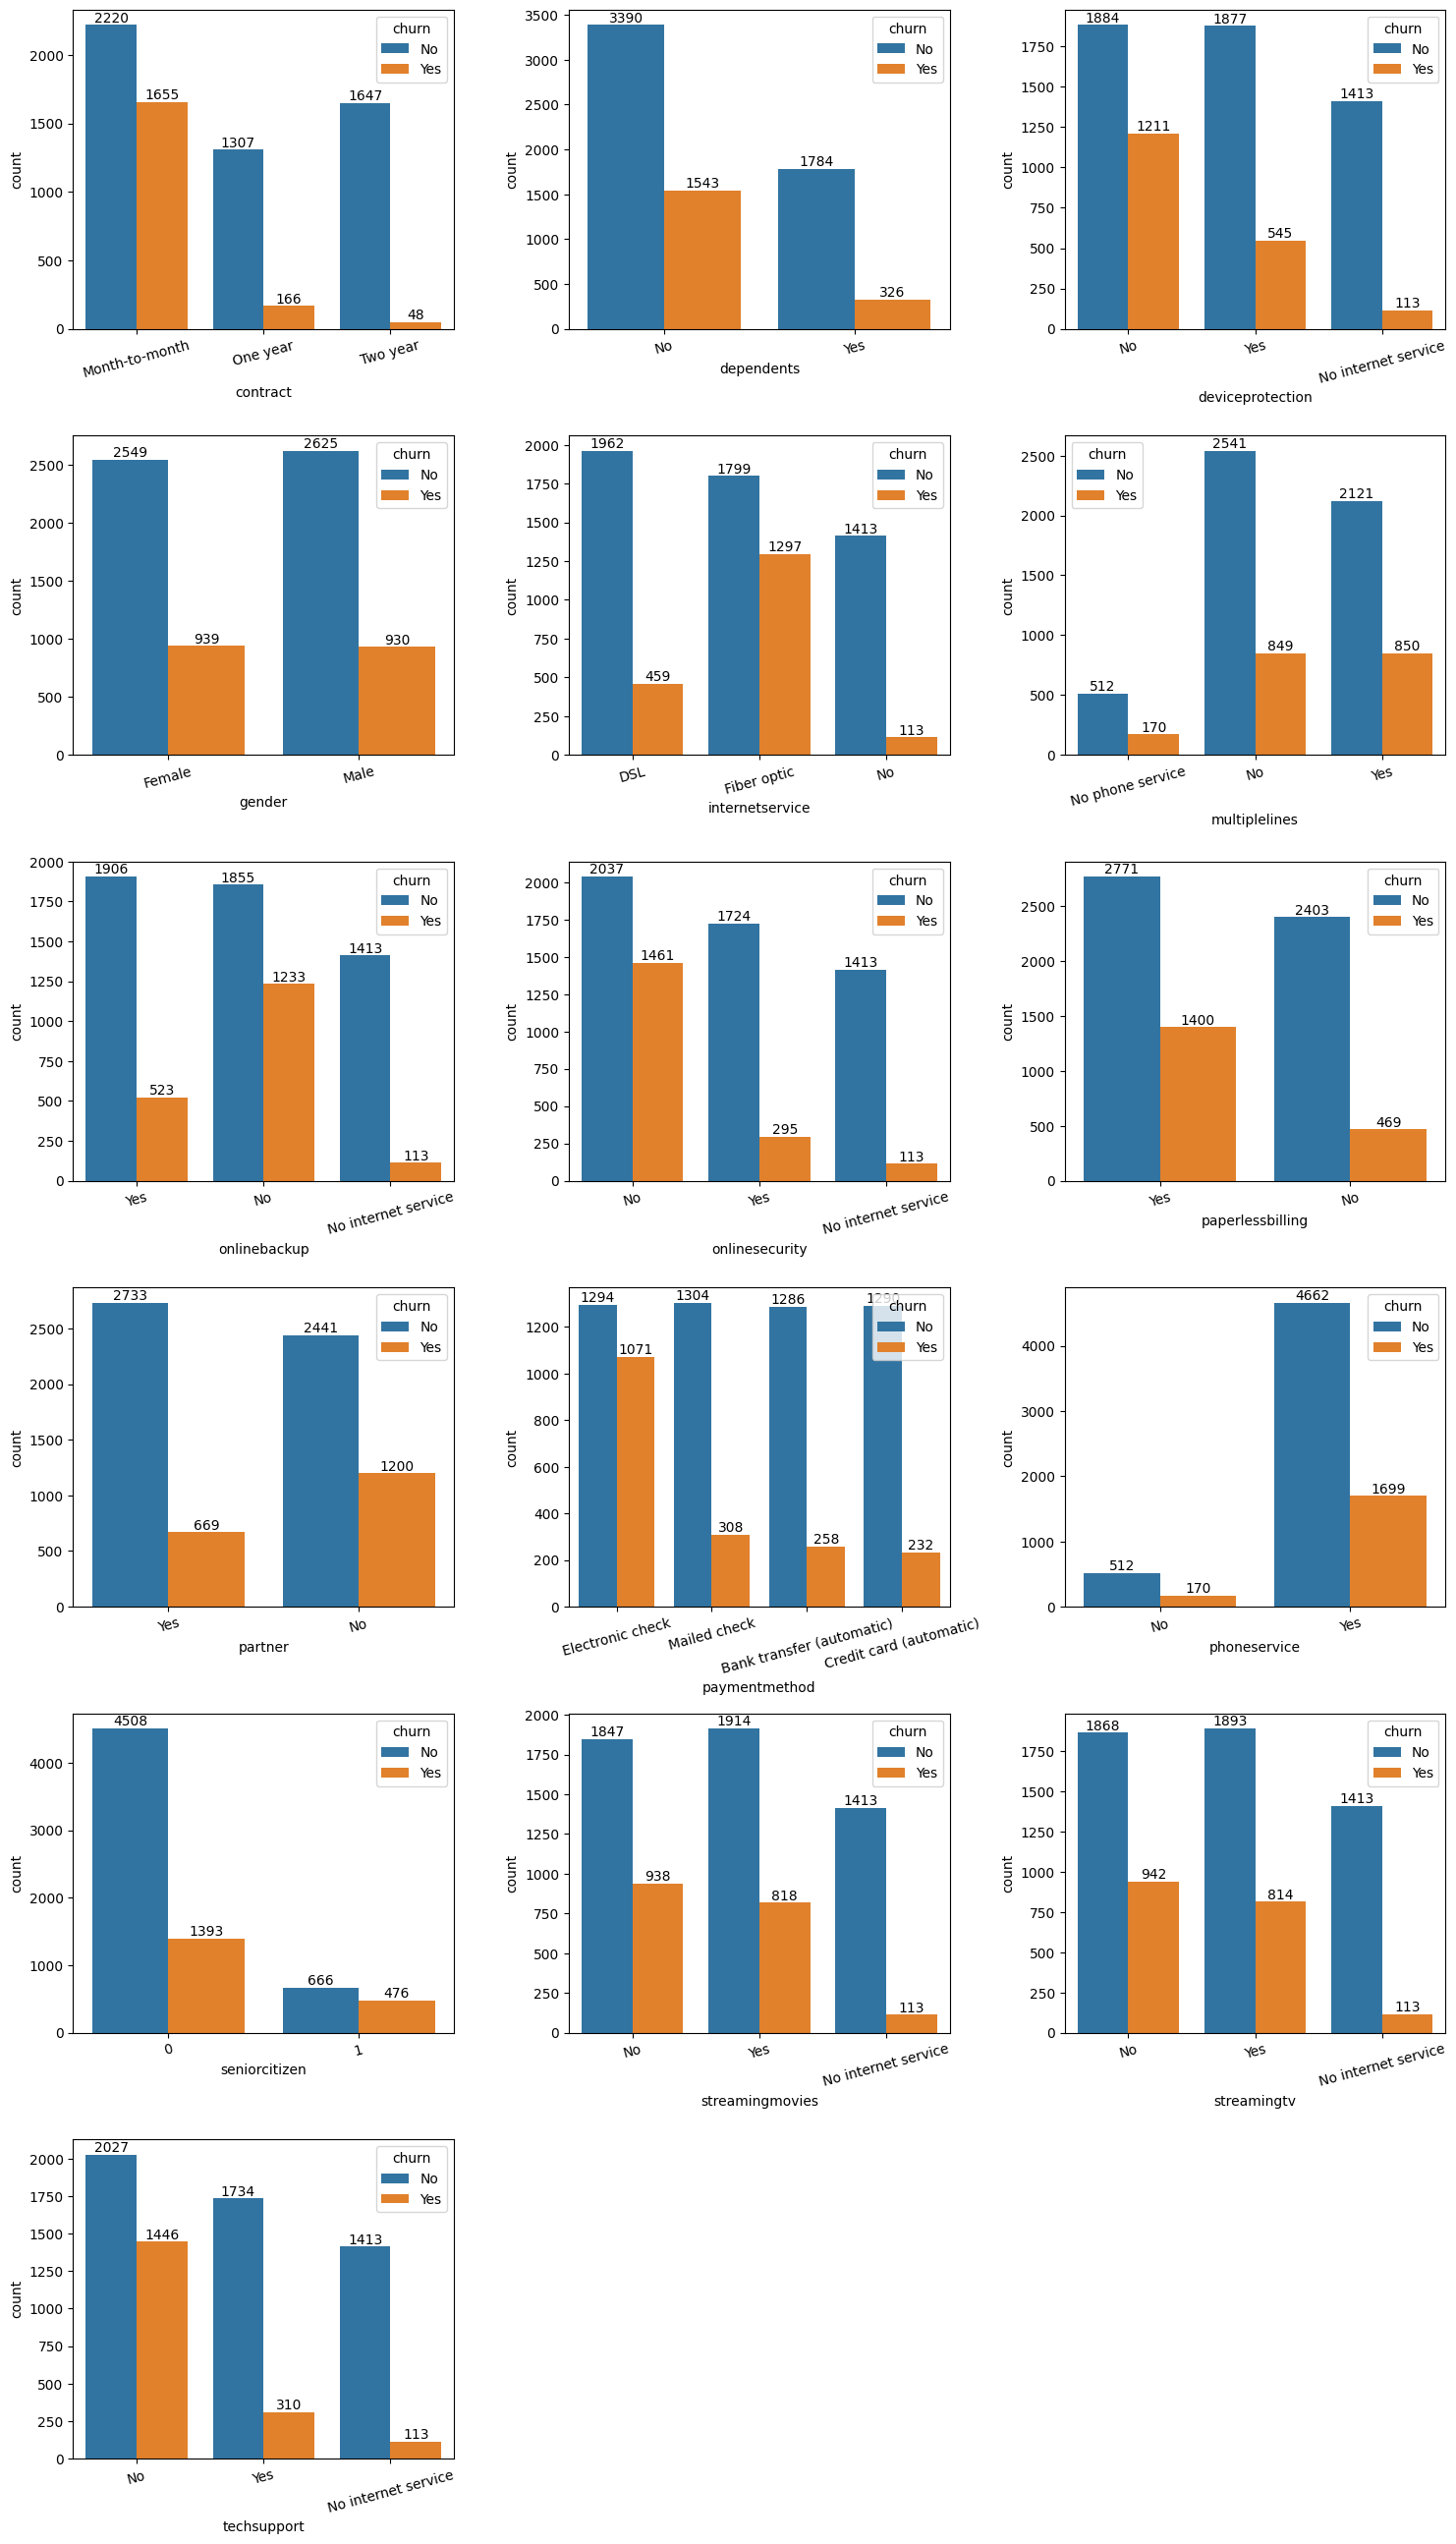

In [25]:
plt.figure(figsize = (15, 26))
for i, col in enumerate(data.columns.difference(num_cols)[1:]):
    plt.subplot(6, 3, i+1)
    ax = sns.countplot(data, x = col, hue = label)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()

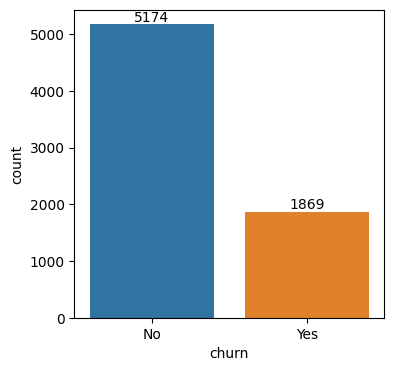

In [26]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data, x = label)
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [22]:
pd.options.display.max_columns = None

## Data Preprocessing


In [27]:
#Label Encoder
def lencoder(col):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    return data[col]

In [28]:
for col in ord_cols:
    data[col] = lencoder(col)

In [29]:
data['churn'] = lencoder('churn')

### One Hot Encoder

In [31]:
ohe_data = pd.get_dummies(data)

In [32]:
ohe_data[ohe_data.select_dtypes(include = 'bool').columns] = ohe_data[ohe_data.select_dtypes(include = 'bool').columns].astype('int')

In [33]:
data = ohe_data.copy()

### Iterative Imputer

In [34]:
imp_mean = IterativeImputer(random_state = 42)

In [35]:
data_impute = imp_mean.fit_transform(data)

In [36]:
data = pd.DataFrame(data_impute, columns = data.columns)

### Training Model

In [37]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.1 MB/s e

In [38]:
!pip -q install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [39]:
!pip -q install --upgrade yellowbrick

In [40]:
import pycaret
from pycaret.classification import *
s = setup(data, target = 'churn', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,churn
2,Target type,Binary
3,Original data shape,"(7043, 41)"
4,Transformed data shape,"(7043, 41)"
5,Transformed train set shape,"(4930, 41)"
6,Transformed test set shape,"(2113, 41)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


In [41]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8008,0.8477,0.5184,0.6601,0.5795,0.4517,0.4581,1.7480
ada,Ada Boost Classifier,0.8000,0.8460,0.5291,0.6541,0.5836,0.4541,0.4594,0.7650
lr,Logistic Regression,0.8034,0.8440,0.5482,0.6572,0.5969,0.4684,0.4724,0.9650
lightgbm,Light Gradient Boosting Machine,0.7931,0.8382,0.5222,0.6351,0.5725,0.4378,0.4419,0.9370
lda,Linear Discriminant Analysis,0.7996,0.8373,0.5566,0.6429,0.5959,0.4636,0.4663,0.1300
rf,Random Forest Classifier,0.7866,0.8259,0.4771,0.6301,0.5420,0.4066,0.4138,0.9360
xgboost,Extreme Gradient Boosting,0.7828,0.8249,0.5115,0.6084,0.5552,0.4130,0.4161,0.4690
nb,Naive Bayes,0.6913,0.8231,0.8494,0.4574,0.5939,0.3799,0.4281,0.1670
et,Extra Trees Classifier,0.7734,0.7950,0.4832,0.5929,0.5309,0.3838,0.3882,0.6180
knn,K Neighbors Classifier,0.7615,0.7407,0.4342,0.5651,0.4904,0.3385,0.3438,0.1690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)

In [ ]:
plt.figure(figsize = (7, 4))
plot_model(best_model, plot = 'feature')

In [ ]:
plt.figure(figsize = (7, 4))
plot_model(best_model, plot = 'auc')

In [ ]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

### 286명의 참 긍정(True Positive)을 보유
이들은 평생 가치를 확장할 수 있는 고객.

또한 이러한 고객에게 제공되는 프로모션은 추가 비용이 되기 때문에 돈을 잃을 150개의 거짓 긍정도 있음

1,402개는 참 부정(좋은 고객)이고 278은 거짓 부정(놓친 기회)

위에서 훈련한 모델은 좋은 모델이지만 문제는 비즈니스 스마트 모델이 아니라는 것.

비즈니스 가치를 극대화하는 모델을 훈련해야

이를 달성하려면 AUC 또는 정확도와 같은 기존 지표 대신 비즈니스 지표를 사용하여 모델을 훈련, 선택 및 최적화 필요

### Cost Benefit Analysis
이탈 모델에서 참양성의 보상은 거짓양성의 비용과 크게 다른 경우가 많음

가정
이탈(참긍정 + 거짓긍정)으로 확인된 모든 고객에게 $1000 바우처가 제공됨.

이탈을 막을 수 있다면 고객 평생 가치로 5,000달러를 얻을 수 있음.

이러한 가정과 위의 혼동 행렬을 사용하여 이 모델의 이익 영향을 계산할 수 있음.

In [49]:
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
images='/content/drive/MyDrive/02.coding/10.Team_Project/08.고객이탈예측/benefit01.png'
image = cv2.imread(images)

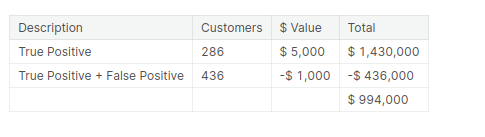

In [51]:
cv2_imshow(image)

In [52]:
def calculate_profit(y, y_pred):
    tp = np.where((y_pred == 1) & (y == 1), 4000, 0)
    fp = np.where((y_pred == 1) & (y == 0), -1000, 0)
    return np.sum([tp,fp])

In [53]:
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [54]:
best_model = compare_models(sort = 'Profit')
#nb 가장 높음

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.6913,0.8231,0.8494,0.4574,0.5939,0.3799,0.4281,311900.0000,0.0600
lda,Linear Discriminant Analysis,0.7996,0.8373,0.5566,0.6429,0.5959,0.4636,0.4663,250400.0000,0.0720
lr,Logistic Regression,0.8034,0.8440,0.5482,0.6572,0.5969,0.4684,0.4724,249000.0000,1.0090
ada,Ada Boost Classifier,0.8000,0.8460,0.5291,0.6541,0.5836,0.4541,0.4594,239800.0000,0.5000
gbc,Gradient Boosting Classifier,0.8008,0.8477,0.5184,0.6601,0.5795,0.4517,0.4581,236000.0000,1.5020
ridge,Ridge Classifier,0.8010,0.0000,0.5161,0.6618,0.5792,0.4515,0.4580,235200.0000,0.0640
lightgbm,Light Gradient Boosting Machine,0.7931,0.8382,0.5222,0.6351,0.5725,0.4378,0.4419,233700.0000,0.7070
qda,Quadratic Discriminant Analysis,0.5988,0.6523,0.7662,0.3826,0.5054,0.2337,0.2761,233600.0000,0.0450
xgboost,Extreme Gradient Boosting,0.7828,0.8249,0.5115,0.6084,0.5552,0.4130,0.4161,224400.0000,0.3130
rf,Random Forest Classifier,0.7866,0.8259,0.4771,0.6301,0.5420,0.4066,0.4138,212800.0000,0.8790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

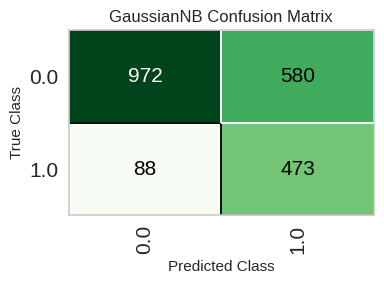

In [55]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')
#이 모델은 거짓 긍정과 거짓 부정에 대해 오류를 범하고 있습니다. 동일한 가정을 사용한 이익 영향:

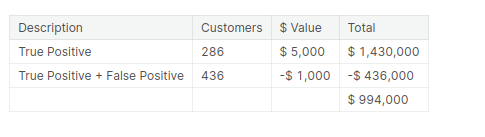

In [57]:
#최고 모델보다 AUC가 2% 적은 모델을 사용하여 $791,000의 수익을 늘림
images2='/content/drive/MyDrive/02.coding/10.Team_Project/08.고객이탈예측/benefit01.png'
image2 = cv2.imread(images2)
cv2_imshow(image2)

In [59]:
save_model(best_model, 'churn-predict')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'seniorcitizen',
                                              'partner', 'dependents', 'tenure',
                                              'phoneservice', 'paperlessbilling',
                                              'monthlycharges', 'totalcharges',
                                              'multiplelines_No',
                                              'multiplelines_No phone service',
                                              'multiplelines_Yes',
                                              'internetservice_DSL',
                                              'internetservice_Fiber optic'...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                   